# Neural Networks & Deep Learning

## Text Classification

In [1]:
# import libraries
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# read in the pop chip reviews
reviews = pd.read_excel('Data/Popchip_Reviews.xlsx')
reviews.head(2)

,Id,UserId,Rating,Priority,Title,Text
0,23689,A21SYVGVNG8RAS,5,Low,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...
1,23690,AQJYXC0MPRQJL,5,Low,Great chip that is different from the rest,I like the puffed nature of this chip that mak...


In [4]:
# import the text preprocessing steps we created earlier
import maven_text_preprocessing

# apply them to the reviews
reviews['Text_Clean'] = maven_text_preprocessing.clean_and_normalize(reviews['Text'])
reviews.head(2)

,Id,UserId,Rating,Priority,Title,Text,Text_Clean
0,23689,A21SYVGVNG8RAS,5,Low,Yummy snacks!,Popchips are the bomb!! I use the parmesan ga...,popchip bomb use parmesan garlic scoop cotta...
1,23690,AQJYXC0MPRQJL,5,Low,Great chip that is different from the rest,I like the puffed nature of this chip that mak...,like puff nature chip make unique chip market ...


In [5]:
# create a count vectorizer matrix
cv = CountVectorizer(stop_words='english', ngram_range=(1,2), min_df=.2)
X = cv.fit_transform(reviews.Text_Clean)

In [6]:
# view the features / inputs X
X_df = pd.DataFrame(X.toarray(), columns=cv.get_feature_names_out())
X_df.head()

,bag,buy,calorie,chip,eat,flavor,good,great,like,love,popchip,potato,potato chip,salt,snack,taste,try
0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,4,0,3,0,0,1,1,0,0,0,2,0,0,1
2,0,0,0,3,0,0,0,1,0,2,1,1,1,1,0,0,0
3,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,1,0,0,2,1,2,0,1,2,0,0,1,1,0,0,1,0


In [7]:
# view the target / output y
y = reviews.Priority
y.head()

0     Low
1     Low
2     Low
3    High
4     Low
Name: Priority, dtype: object

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Naive Bayes

In [9]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb = MultinomialNB()

# Train the model
nb.fit(X_train, y_train)

# Make predictions
y_pred_nb = nb.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_nb))
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb):.2f}')

              precision    recall  f1-score   support

        High       0.60      0.16      0.25        19
         Low       0.85      0.98      0.91        94

    accuracy                           0.84       113
   macro avg       0.73      0.57      0.58       113
weighted avg       0.81      0.84      0.80       113

Accuracy: 0.84


### Neural Network

In [11]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLPClassifer classifier
nn = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', max_iter=2000, random_state=42)

# Train the model
nn.fit(X_train, y_train)

# Make predictions
y_pred_nn = nn.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred_nn))
print(f'Accuracy: {accuracy_score(y_test, y_pred_nn):.2f}')

              precision    recall  f1-score   support

        High       0.47      0.47      0.47        19
         Low       0.89      0.89      0.89        94

    accuracy                           0.82       113
   macro avg       0.68      0.68      0.68       113
weighted avg       0.82      0.82      0.82       113

Accuracy: 0.82


## Matrix Representation of Weights & Biases

In [12]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier

# read in lemonade prices data
lemonade_data = pd.read_csv('Data/lemonade_data.csv')
lemonade_data.head()

,temperature,weekend,lemonade_price,blocks_from_park,profitable
0,90,1,1.00,1,1
1,85,1,1.25,2,1
2,78,0,1.50,3,0
3,95,1,0.75,1,1
4,82,0,1.25,4,0


In [13]:
# separate out the inputs and output
X = lemonade_data[['temperature', 'weekend', 'lemonade_price', 'blocks_from_park']]
y = lemonade_data.profitable

In [14]:
# fit a neural network with 1 hidden layer of 2 nodes
mlp = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', max_iter=2000, random_state=42)
mlp.fit(X, y)

,hidden_layer_sizes,"(2,)"
,activation,'logistic'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,2000
,shuffle,True
,random_state,42


Our neural network structure:

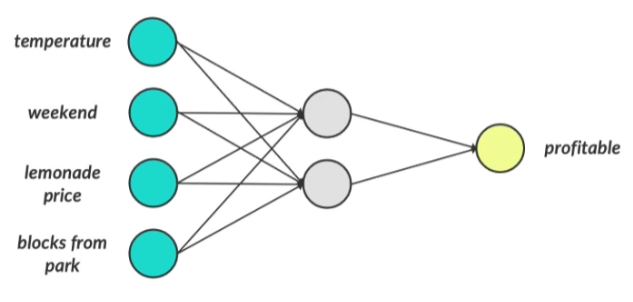

In [16]:
# access the weights (coefs_) and biases (intercepts_)
weights = mlp.coefs_  # list of weight matrices
biases = mlp.intercepts_  # list of bias vectors

# print out the weight matrices and bias vectors for each layer
for i, (w, b) in enumerate(zip(weights, biases)):
    print(f"Connections {i+1}:")
    print("  Weights:")
    print(w)  # weight matrix
    print("  Biases:")
    print(b)  # bias vector
    print()

Connections 1:
  Weights:
[[-0.06429944  0.07118474]
 [-1.39850568  1.50303923]
 [ 1.2049122  -1.55743251]
 [ 1.08364013 -1.34251138]]
  Biases:
[ 1.73676391 -1.25815648]

Connections 2:
  Weights:
[[-3.11143   ]
 [ 1.82913466]]
  Biases:
[0.85036249]

